In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [4]:
df=df.drop(['day','month','year'],axis=1)

In [5]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [6]:
X=df.drop('FWI',axis=1)
y=df['FWI']

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=34)

<Axes: >

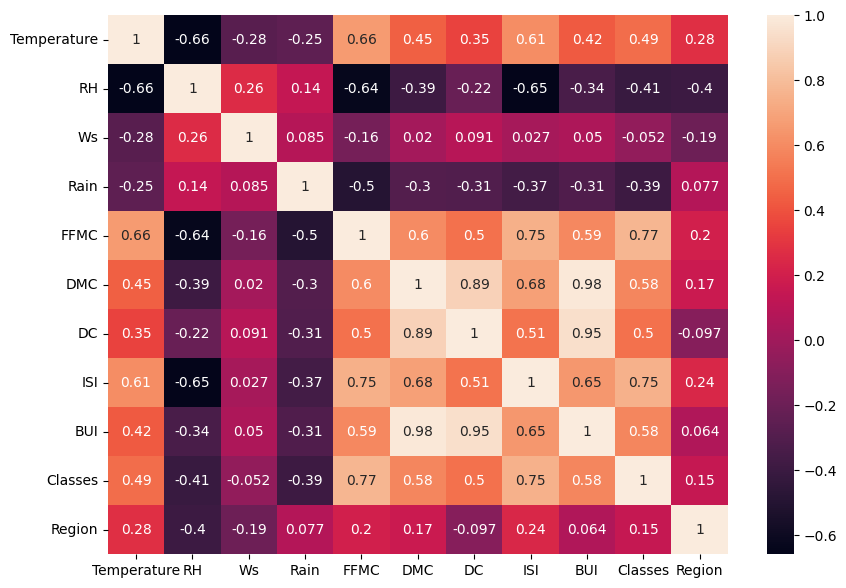

In [8]:
plt.figure(figsize=(10,7))
sns.heatmap(X_train.corr(),annot=True)

In [9]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [10]:
corr_features=correlation(X_train,0.85)
print(corr_features)

{'DC', 'BUI'}


In [11]:
corr_features

{'BUI', 'DC'}

In [12]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

Mean absolute error 0.7433926086770393
R2 Score 0.9792741570653651


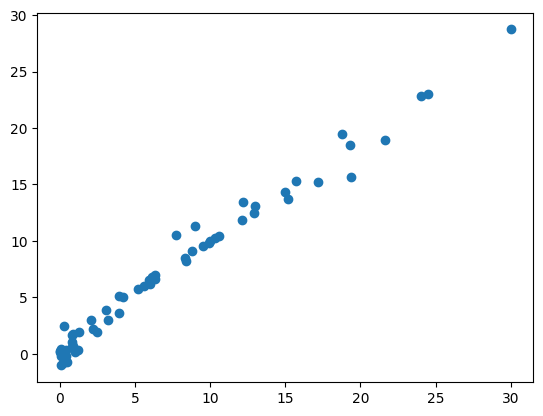

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 1.1986159476339322
R2 Score 0.9483405807978365


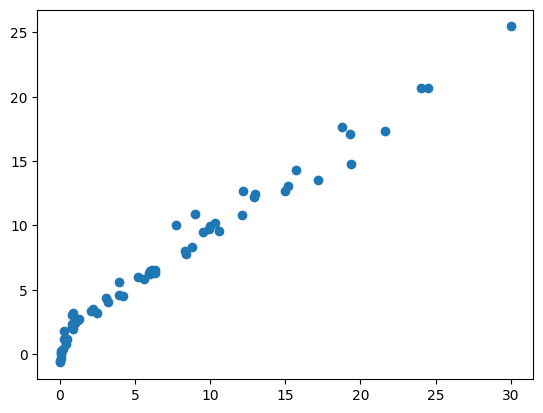

In [15]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

In [16]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

Mean absolute error 0.7277254673437809
R2 Score 0.9796086893499161


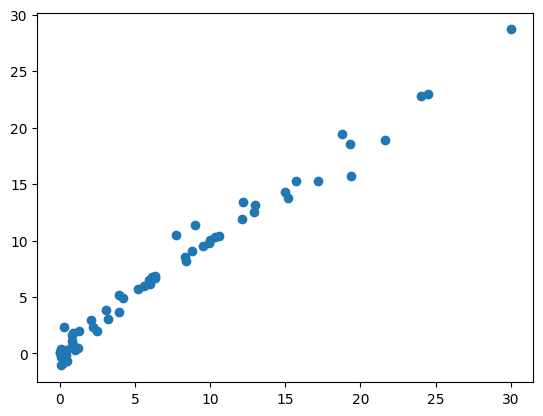

In [17]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.7555624552476636
R2 Score 0.9784788997577422


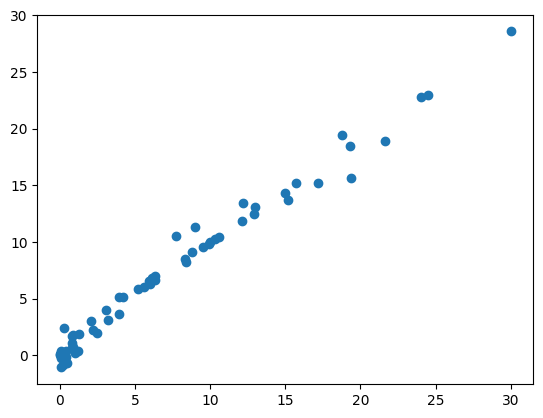

In [18]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.7555624552476636
R2 Score 0.9784788997577422


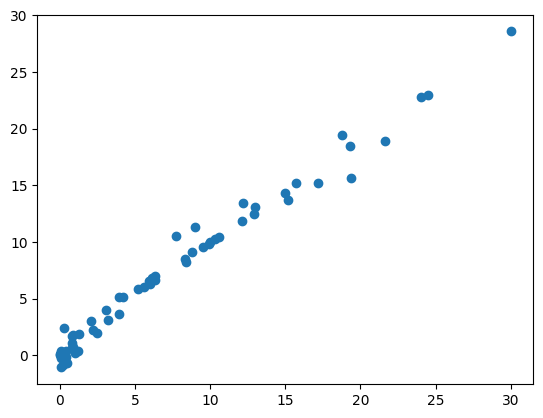

In [19]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [20]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

Mean absolute error 1.8579584325217633
R2 Score 0.8800221677901574


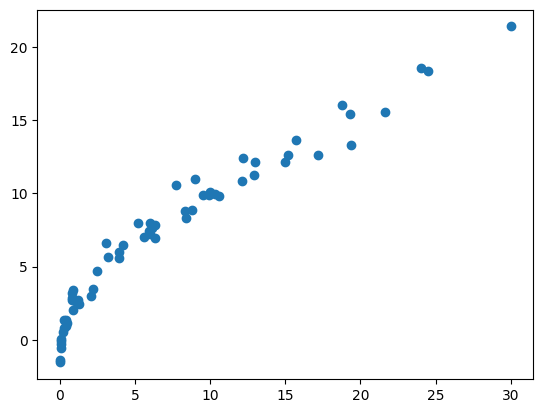

In [21]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.7769433211627254
R2 Score 0.9772861320221262


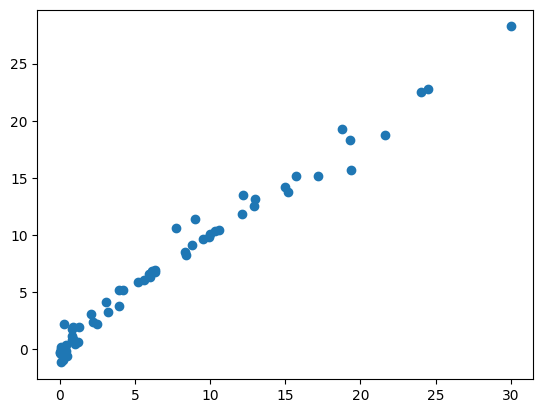

In [22]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [23]:
elasticcv.alphas_

array([13.60471348, 12.68780133, 11.83268598, 11.03520255, 10.29146683,
        9.59785641,  8.95099301,  8.34772604,  7.78511724,  7.2604264 ,
        6.77109796,  6.31474862,  5.8891557 ,  5.49224631,  5.12208729,
        4.77687575,  4.45493031,  4.15468292,  3.8746712 ,  3.61353133,
        3.36999141,  3.14286527,  2.93104667,  2.73350393,  2.54927492,
        2.37746232,  2.21722932,  2.06779548,  1.92843299,  1.79846306,
        1.67725267,  1.56421145,  1.45878883,  1.36047135,  1.26878013,
        1.1832686 ,  1.10352025,  1.02914668,  0.95978564,  0.8950993 ,
        0.8347726 ,  0.77851172,  0.72604264,  0.6771098 ,  0.63147486,
        0.58891557,  0.54922463,  0.51220873,  0.47768758,  0.44549303,
        0.41546829,  0.38746712,  0.36135313,  0.33699914,  0.31428653,
        0.29310467,  0.27335039,  0.25492749,  0.23774623,  0.22172293,
        0.20677955,  0.1928433 ,  0.17984631,  0.16772527,  0.15642114,
        0.14587888,  0.13604713,  0.12687801,  0.11832686,  0.11

In [24]:
scaler

StandardScaler()

In [25]:
ridge

Ridge()

In [26]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))